### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import learning_curve
from scipy import stats
import math
import pickle

In [2]:
# Load the dataset

df = pd.read_excel('Consumptions.xlsx')

### Data Preprocessing

In [3]:
# No.of Rows and columns

df.shape

(324, 22)

In [4]:
# Dataset Preview

df.head()

,Date,Knitting - D,Knitting - N,Bulk Dye - D,Bulk Dye - N,Sample Dye - D,Sample Dye - N,Dryers - D,Dryers - N,Presetting - D,...,Chillers - N,AHU - D,AHU - N,Compressor - D,Compressor - N,Luwa - D,Luwa - N,Electricity (kWh),Steam (kg),Total Water (Cu.m.)
0,2024-01-01,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,1105,-,-
1,2024-01-02,-,-,-,-,-,-,-,-,-,...,1,5,6,2,3,0,9,19118,50189,713
2,2024-01-15,36,30,-,38,2,-,6,-,-,...,1,5,4,2,2,3,3,18897,44268,437
3,2024-01-24,9,9,37,37,-,-,-,-,-,...,1,1,4,1,1,1,1,11195,84619,1064
4,2024-01-25,11,3,36,34,-,-,-,-,-,...,1,3,2,1,1,1,1,11593,85820,1023


In [5]:
# Checking for null values

df.isnull().sum()

Date                   0
Knitting - D           0
Knitting - N           0
Bulk Dye - D           0
Bulk Dye - N           0
Sample Dye - D         0
Sample Dye - N         0
Dryers - D             0
Dryers - N             0
Presetting - D         0
Presetting - N         0
Chillers - D           0
Chillers - N           0
AHU - D                0
AHU - N                0
Compressor - D         0
Compressor - N         0
Luwa - D               0
Luwa - N               0
Electricity (kWh)      0
Steam (kg)             0
Total Water (Cu.m.)    0
dtype: int64

In [6]:
# Checking for duplicate values

df.duplicated().sum()

np.int64(0)

In [7]:
# Data Cleaning
# Replace '-' with NaN

df.replace('-', np.nan, inplace=True)

C:\Users\WarthulaD\AppData\Local\Temp\ipykernel_9536\3675378145.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('-', np.nan, inplace=True)


In [8]:
# Then fill NaNs with 0

df.fillna(0, inplace=True)

In [9]:
df.head()

,Date,Knitting - D,Knitting - N,Bulk Dye - D,Bulk Dye - N,Sample Dye - D,Sample Dye - N,Dryers - D,Dryers - N,Presetting - D,...,Chillers - N,AHU - D,AHU - N,Compressor - D,Compressor - N,Luwa - D,Luwa - N,Electricity (kWh),Steam (kg),Total Water (Cu.m.)
0,2024-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1105.0,0.0,0.0
1,2024-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,5.0,6.0,2.0,3.0,0.0,9.0,19118.0,50189.0,713.0
2,2024-01-15,36.0,30.0,0.0,38.0,2.0,0.0,6.0,0.0,0.0,...,1.0,5.0,4.0,2.0,2.0,3.0,3.0,18897.0,44268.0,437.0
3,2024-01-24,9.0,9.0,37.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,4.0,1.0,1.0,1.0,1.0,11195.0,84619.0,1064.0
4,2024-01-25,11.0,3.0,36.0,34.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,2.0,1.0,1.0,1.0,1.0,11593.0,85820.0,1023.0


In [10]:
df.isnull().sum()

Date                   0
Knitting - D           0
Knitting - N           0
Bulk Dye - D           0
Bulk Dye - N           0
Sample Dye - D         0
Sample Dye - N         0
Dryers - D             0
Dryers - N             0
Presetting - D         0
Presetting - N         0
Chillers - D           0
Chillers - N           0
AHU - D                0
AHU - N                0
Compressor - D         0
Compressor - N         0
Luwa - D               0
Luwa - N               0
Electricity (kWh)      0
Steam (kg)             0
Total Water (Cu.m.)    0
dtype: int64

In [11]:
# Drop unnecessary columns

columns_to_drop = [
    'Date', 'Electricity (kWh)',
    'Steam (kg)'
]
df.drop(columns=columns_to_drop, inplace=True)

In [12]:
df.head()

,Knitting - D,Knitting - N,Bulk Dye - D,Bulk Dye - N,Sample Dye - D,Sample Dye - N,Dryers - D,Dryers - N,Presetting - D,Presetting - N,Chillers - D,Chillers - N,AHU - D,AHU - N,Compressor - D,Compressor - N,Luwa - D,Luwa - N,Total Water (Cu.m.)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,6.0,2.0,3.0,0.0,9.0,713.0
2,36.0,30.0,0.0,38.0,2.0,0.0,6.0,0.0,0.0,0.0,1.0,1.0,5.0,4.0,2.0,2.0,3.0,3.0,437.0
3,9.0,9.0,37.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1064.0
4,11.0,3.0,36.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,1023.0


In [13]:
# Check the data types of each variable
print(df.dtypes)

Knitting - D           float64
Knitting - N           float64
Bulk Dye - D           float64
Bulk Dye - N           float64
Sample Dye - D         float64
Sample Dye - N         float64
Dryers - D             float64
Dryers - N             float64
Presetting - D         float64
Presetting - N         float64
Chillers - D           float64
Chillers - N           float64
AHU - D                float64
AHU - N                float64
Compressor - D         float64
Compressor - N         float64
Luwa - D               float64
Luwa - N               float64
Total Water (Cu.m.)    float64
dtype: object


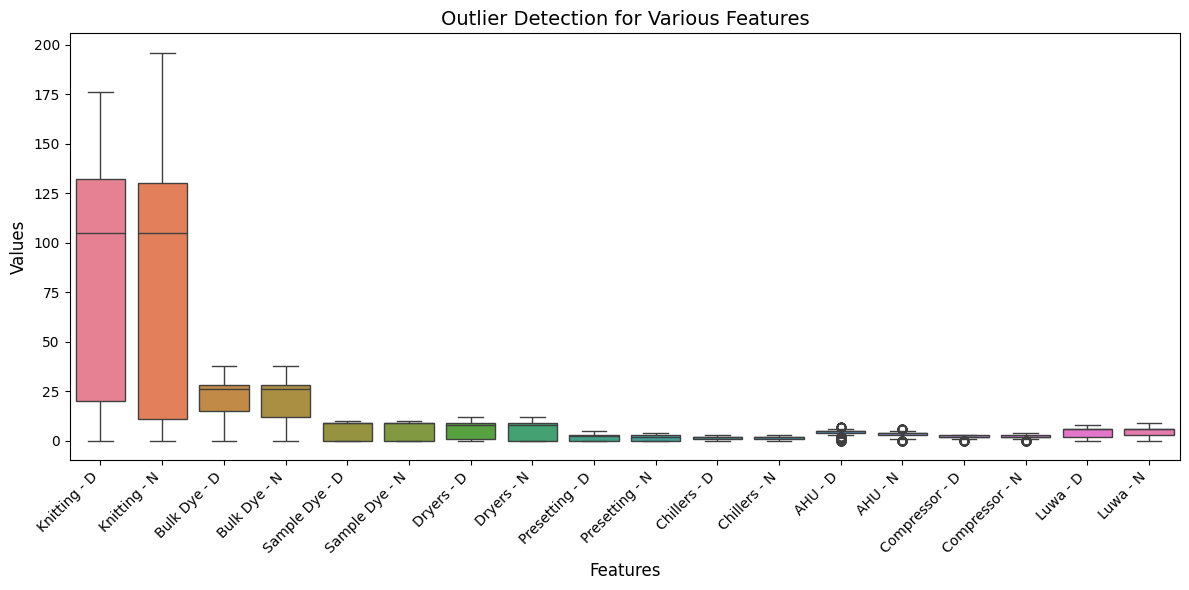

In [14]:
# Outlier Detection and Handling

columns_ind = df.iloc[:,:18]

plt.figure(figsize=(12, 6))
sns.boxplot(data=columns_ind)

# Add title and labels

plt.title("Outlier Detection for Various Features", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.xlabel("Features", fontsize=12)
plt.ylabel("Values", fontsize=12)

# Show the plot

plt.tight_layout()
plt.show()

In [15]:
# Calculating IQR for each column
Q1 = columns_ind.quantile(0.25)
Q3 = columns_ind.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers
outliers = ((columns_ind < (Q1 - 1.5 * IQR)) | (columns_ind > (Q3 + 1.5 * IQR)))

# Count outliers for each column
outlier_counts = outliers.sum(axis=0)

print("Outlier counts in each column:")
print(outlier_counts)

Outlier counts in each column:
Knitting - D       0
Knitting - N       0
Bulk Dye - D       0
Bulk Dye - N       0
Sample Dye - D     0
Sample Dye - N     0
Dryers - D         0
Dryers - N         0
Presetting - D     0
Presetting - N     0
Chillers - D       0
Chillers - N       0
AHU - D           90
AHU - N           99
Compressor - D    46
Compressor - N    59
Luwa - D           0
Luwa - N           0
dtype: int64


In [16]:
# Replacing outliers with NaN (or any other strategy like median)
data_no_outliers = columns_ind.mask(outliers)

# Optionally, you can replace NaN values with the column median
data_no_outliers = data_no_outliers.fillna(columns_ind.median())

data_no_outliers

,Knitting - D,Knitting - N,Bulk Dye - D,Bulk Dye - N,Sample Dye - D,Sample Dye - N,Dryers - D,Dryers - N,Presetting - D,Presetting - N,Chillers - D,Chillers - N,AHU - D,AHU - N,Compressor - D,Compressor - N,Luwa - D,Luwa - N
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,2.0,2.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,4.0,2.0,3.0,0.0,9.0
2,36.0,30.0,0.0,38.0,2.0,0.0,6.0,0.0,0.0,0.0,1.0,1.0,5.0,4.0,2.0,2.0,3.0,3.0
3,9.0,9.0,37.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,4.0,1.0,1.0,1.0,1.0
4,11.0,3.0,36.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,154.0,168.0,25.0,27.0,9.0,10.0,10.0,8.0,3.0,4.0,2.0,3.0,5.0,4.0,3.0,3.0,7.0,7.0
320,159.0,141.0,27.0,26.0,10.0,10.0,8.0,8.0,4.0,3.0,2.0,3.0,6.0,4.0,3.0,3.0,7.0,7.0
321,166.0,171.0,25.0,27.0,10.0,10.0,8.0,9.0,2.0,2.0,2.0,1.0,6.0,4.0,3.0,3.0,7.0,7.0
322,150.0,165.0,26.0,28.0,10.0,10.0,9.0,9.0,3.0,4.0,2.0,1.0,6.0,4.0,3.0,3.0,7.0,7.0


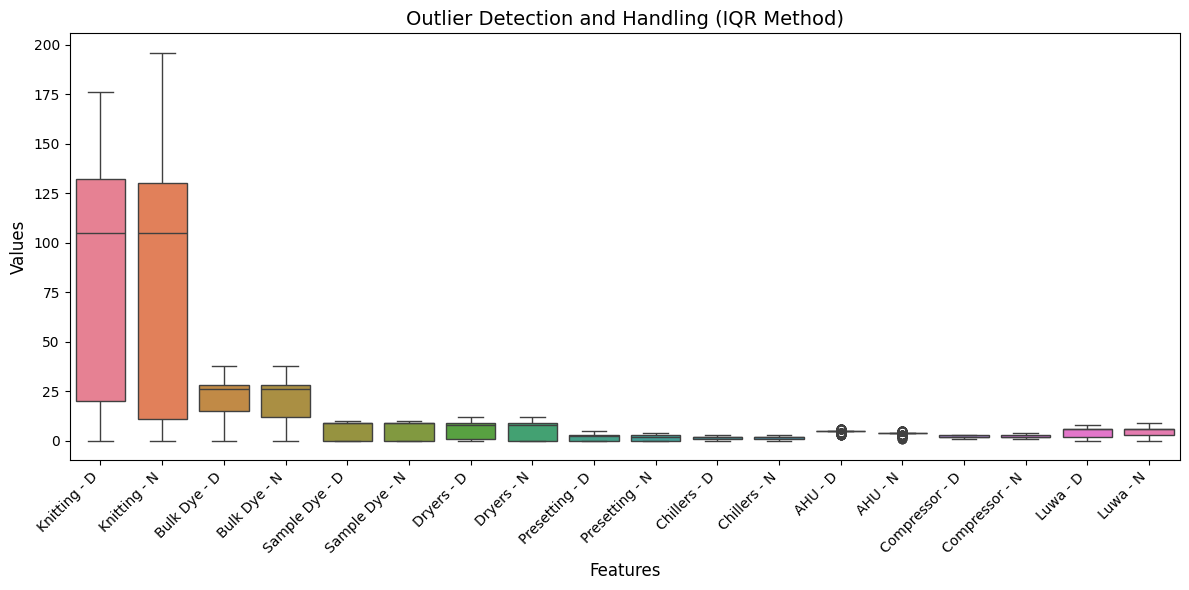

In [17]:
# Plotting Boxplot after handling outliers

plt.figure(figsize=(12, 6))
sns.boxplot(data=data_no_outliers)
plt.title("Outlier Detection and Handling (IQR Method)", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.tight_layout()
plt.show()


In [18]:
data = pd.concat([data_no_outliers, df['Total Water (Cu.m.)']], axis=1)

In [19]:
data.isnull().sum()

Knitting - D           0
Knitting - N           0
Bulk Dye - D           0
Bulk Dye - N           0
Sample Dye - D         0
Sample Dye - N         0
Dryers - D             0
Dryers - N             0
Presetting - D         0
Presetting - N         0
Chillers - D           0
Chillers - N           0
AHU - D                0
AHU - N                0
Compressor - D         0
Compressor - N         0
Luwa - D               0
Luwa - N               0
Total Water (Cu.m.)    0
dtype: int64

In [20]:
# Check the data types of each variable
print(data.dtypes)

Knitting - D           float64
Knitting - N           float64
Bulk Dye - D           float64
Bulk Dye - N           float64
Sample Dye - D         float64
Sample Dye - N         float64
Dryers - D             float64
Dryers - N             float64
Presetting - D         float64
Presetting - N         float64
Chillers - D           float64
Chillers - N           float64
AHU - D                float64
AHU - N                float64
Compressor - D         float64
Compressor - N         float64
Luwa - D               float64
Luwa - N               float64
Total Water (Cu.m.)    float64
dtype: object


### Data Visualization

#### Correlation amaong Independant Variables

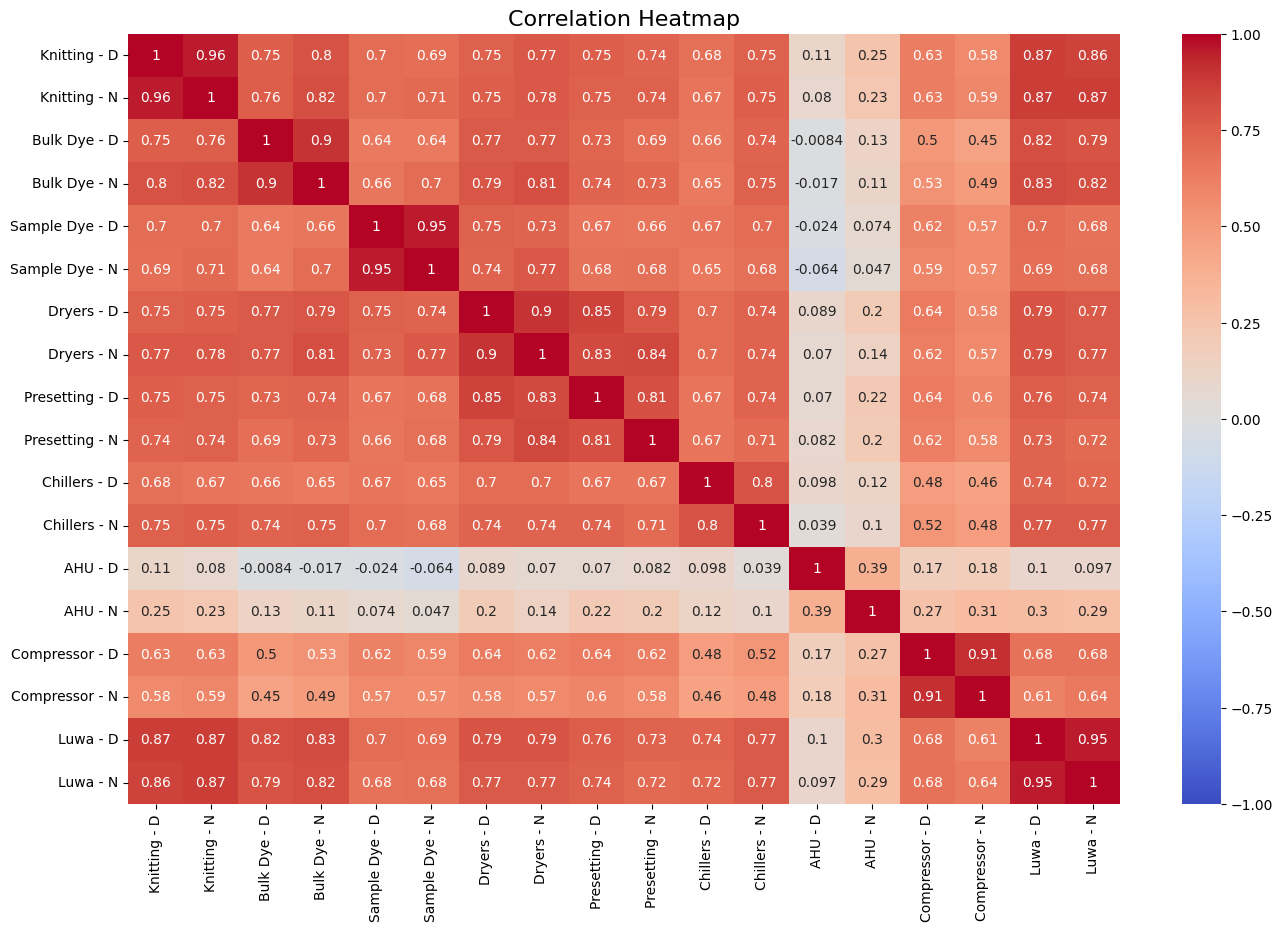

In [21]:
# Select the columns for the heatmap
columns_corr = [
    'Knitting - D', 'Knitting - N', 
    'Bulk Dye - D', 'Bulk Dye - N', 
    'Sample Dye - D', 'Sample Dye - N', 
    'Dryers - D', 'Dryers - N', 
    'Presetting - D', 'Presetting - N', 
    'Chillers - D', 'Chillers - N', 
    'AHU - D', 'AHU - N', 
    'Compressor - D', 'Compressor - N', 
    'Luwa - D', 'Luwa - N'
]

# Draw the heatmap

plt.figure(figsize=(16, 10))
sns.heatmap(data[columns_corr].corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

#### Correlation between Independant Variables & Electricity(kWh) 

<Figure size 1200x800 with 0 Axes>

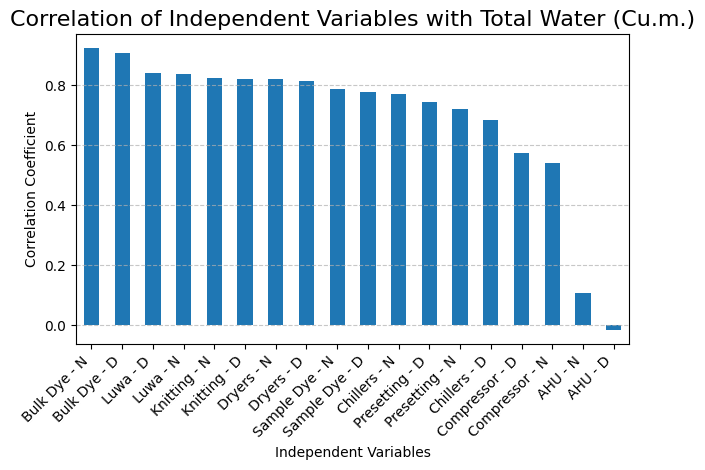

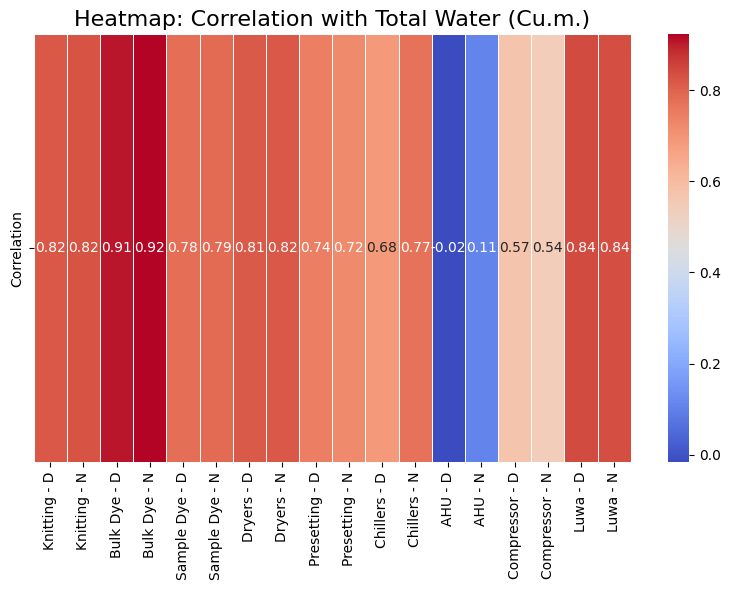

In [22]:
dependent_variable_corr = 'Total Water (Cu.m.)'

# Calculate correlation coefficients
correlations = {
    column: data[column].corr(data[dependent_variable_corr]) for column in columns_corr
}

# Convert to DataFrame for visualization
correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])

# Plot the correlation as a bar chart
plt.figure(figsize=(12, 8))
correlation_df.sort_values(by='Correlation', ascending=False).plot(kind='bar', legend=False)
plt.title(f"Correlation of Independent Variables with {dependent_variable_corr}", fontsize=16)
plt.ylabel("Correlation Coefficient")
plt.xlabel("Independent Variables")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Optionally, as a heatmap:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df.T, annot=True, cmap="coolwarm", cbar=True, fmt=".2f", linewidths=0.5)
plt.title(f"Heatmap: Correlation with {dependent_variable_corr}", fontsize=16)
plt.tight_layout()
plt.show()

#### Distribution of each Independant Variable

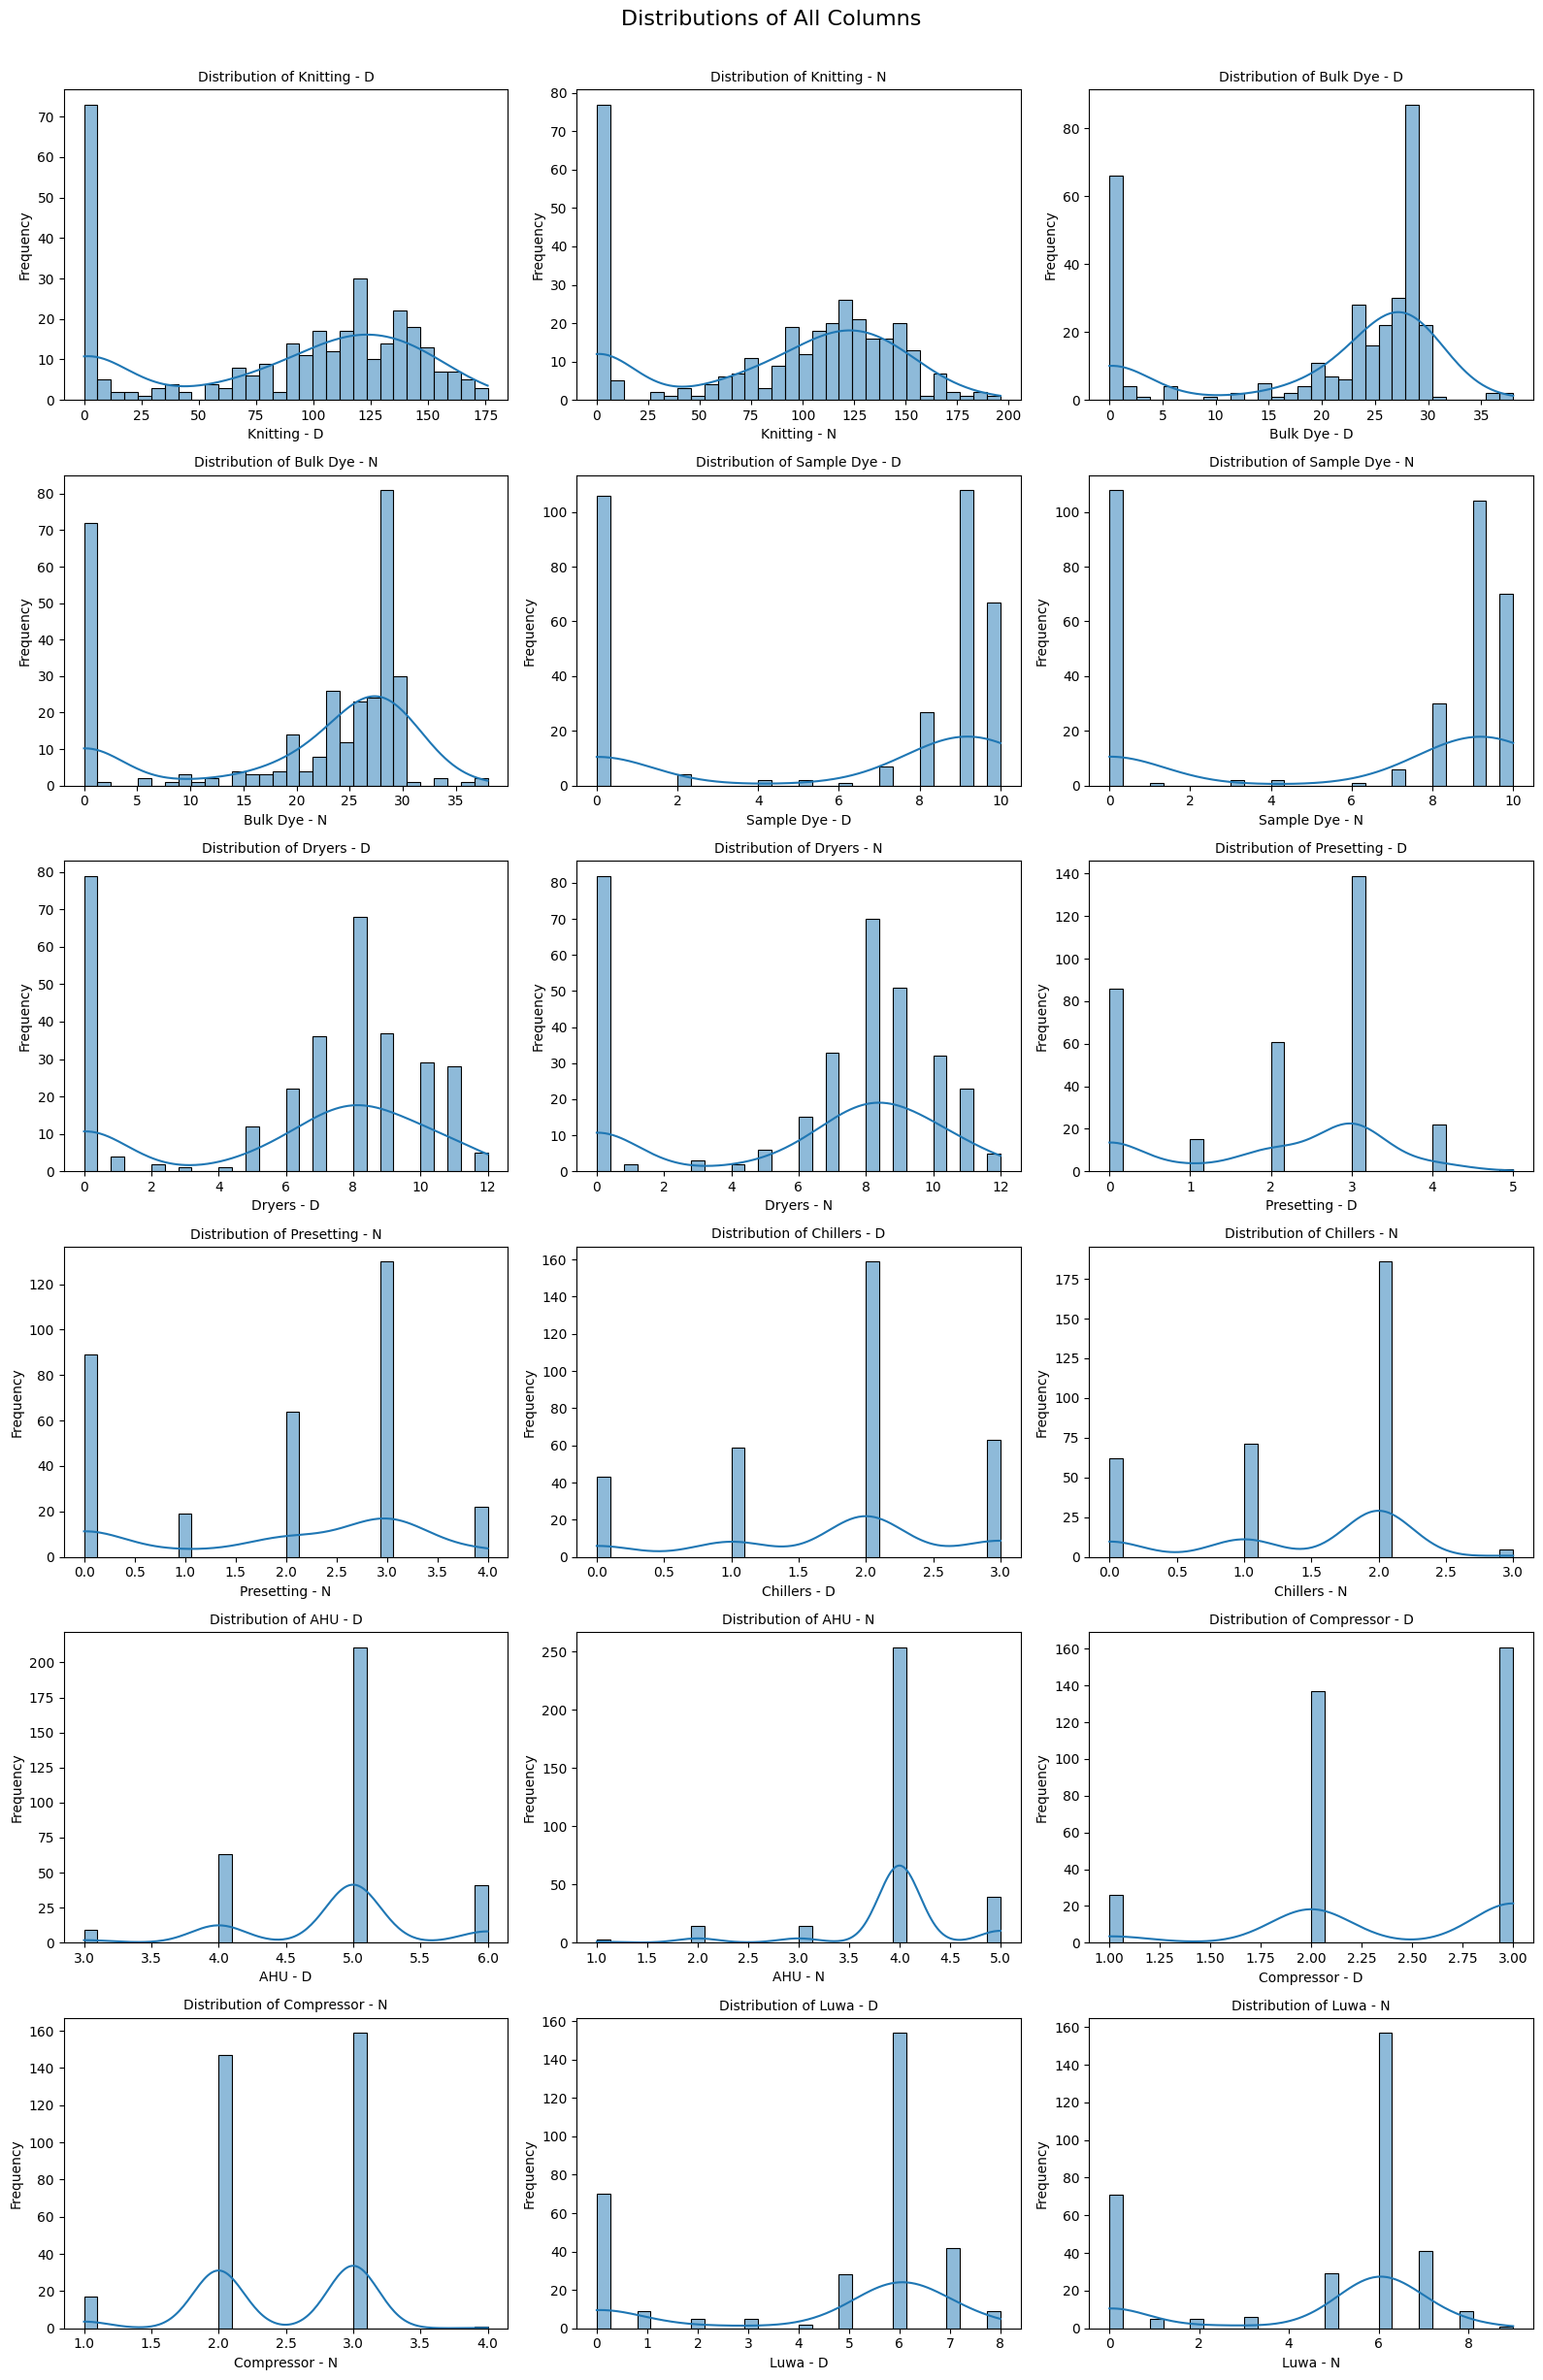

In [23]:
columns = [
    'Knitting - D', 'Knitting - N', 
    'Bulk Dye - D', 'Bulk Dye - N', 
    'Sample Dye - D', 'Sample Dye - N', 
    'Dryers - D', 'Dryers - N', 
    'Presetting - D', 'Presetting - N', 
    'Chillers - D', 'Chillers - N', 
    'AHU - D', 'AHU - N', 
    'Compressor - D', 'Compressor - N', 
    'Luwa - D', 'Luwa - N'
]

# Calculate the grid size for subplots
n_columns = 3  # Number of histograms per row
n_rows = math.ceil(len(columns) / n_columns)  # Number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_columns, figsize=(16, n_rows * 4))
axes = axes.flatten()  # Flatten axes array for easy indexing

# Plot each histogram
for i, column in enumerate(columns):
    sns.histplot(data[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {column}", fontsize=10)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

# Remove any unused subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.suptitle("Distributions of All Columns", fontsize=16, y=1.02)
plt.show()

#### Trends for all Independant Variables

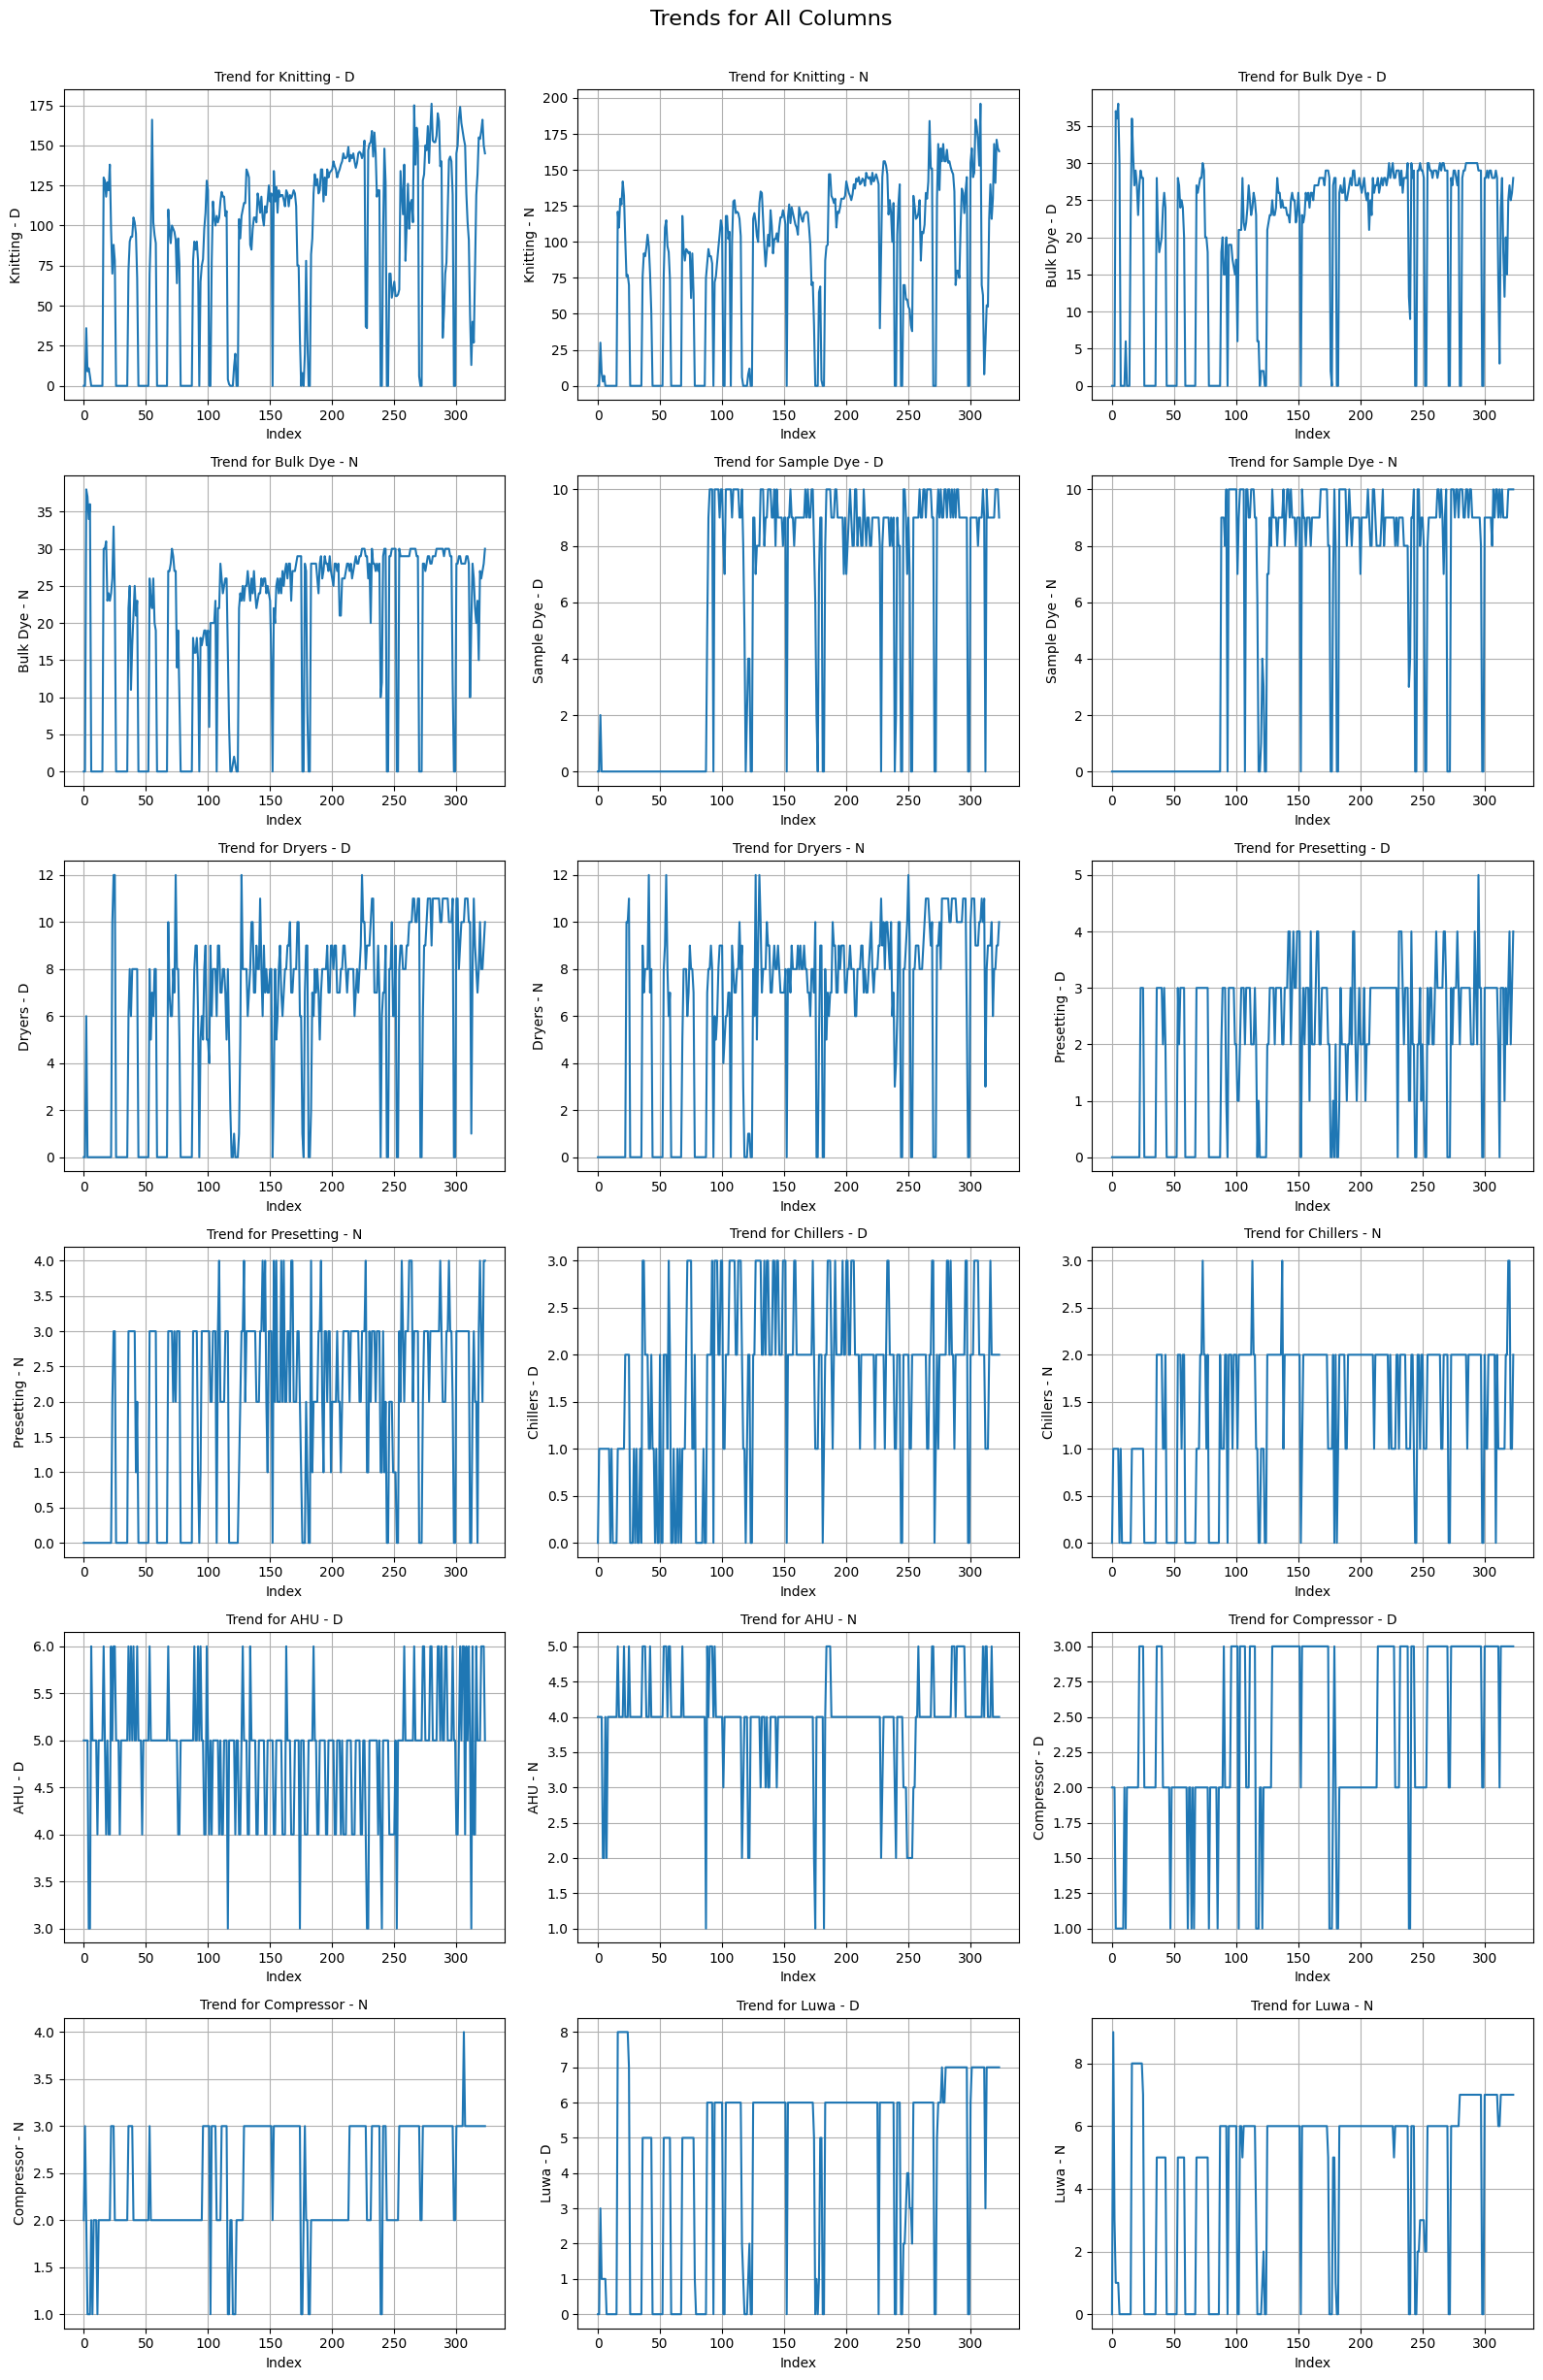

In [24]:
# Calculate the grid size for subplots
n_columns = 3  # Number of plots per row
n_rows = math.ceil(len(columns) / n_columns)  # Number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_columns, figsize=(16, n_rows * 4))
axes = axes.flatten()  # Flatten axes array for easy indexing

# Plot each trend
for i, column in enumerate(columns):
    axes[i].plot(data[column])
    axes[i].set_title(f"Trend for {column}", fontsize=10)
    axes[i].set_xlabel("Index")
    axes[i].set_ylabel(column)
    axes[i].grid(True)

# Remove any unused subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.suptitle("Trends for All Columns", fontsize=16, y=1.02)
plt.show()



#### Scatter Plots - Independant Variables vs Dependant Variable

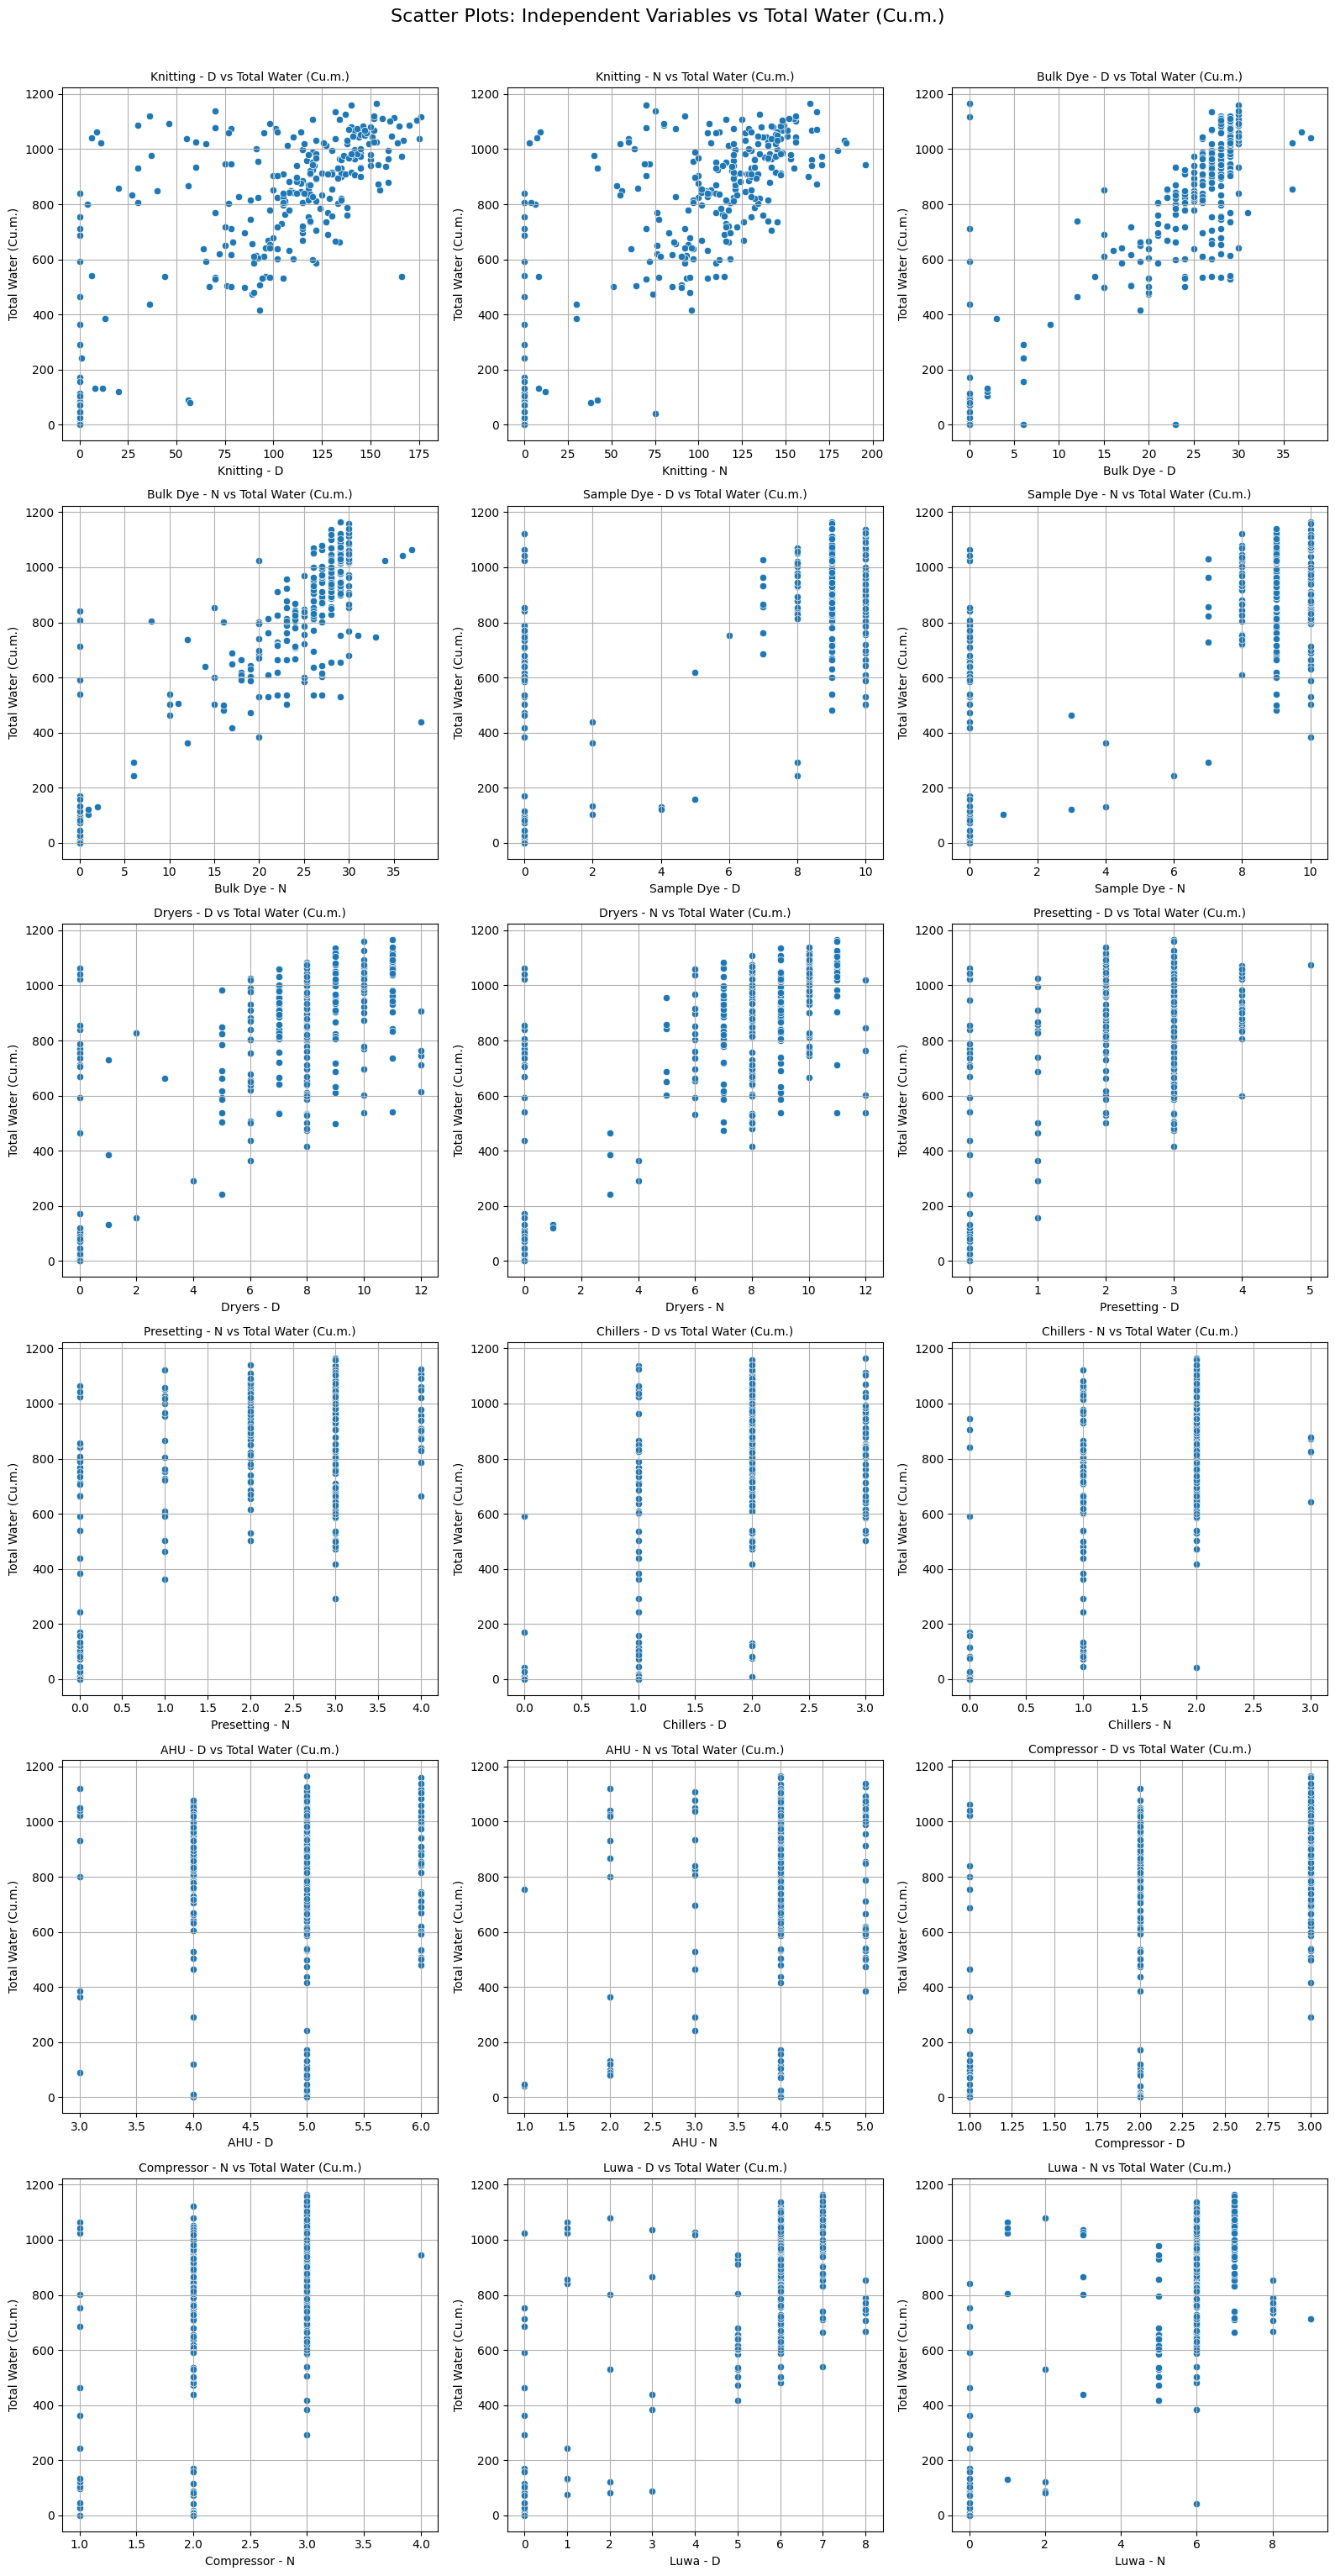

In [25]:
# Define independent variables
independent_columns = [
    'Knitting - D', 'Knitting - N', 
    'Bulk Dye - D', 'Bulk Dye - N', 
    'Sample Dye - D', 'Sample Dye - N', 
    'Dryers - D', 'Dryers - N', 
    'Presetting - D', 'Presetting - N', 
    'Chillers - D', 'Chillers - N', 
    'AHU - D', 'AHU - N', 
    'Compressor - D', 'Compressor - N', 
    'Luwa - D', 'Luwa - N'
]

dependent_variable = 'Total Water (Cu.m.)'  # Dependent variable

# Calculate the grid size for subplots
n_columns = 3  # Number of scatter plots per row
n_rows = math.ceil(len(independent_columns) / n_columns)  # Number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_columns, figsize=(16, n_rows * 5))
axes = axes.flatten()  # Flatten axes array for easy indexing

# Plot each scatter plot
for i, column in enumerate(independent_columns):
    sns.scatterplot(x=column, y=dependent_variable, data=data, ax=axes[i])
    axes[i].set_title(f"{column} vs {dependent_variable}", fontsize=10)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel(dependent_variable)
    axes[i].grid(True)

# Remove any unused subplots
for j in range(len(independent_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.suptitle(f"Scatter Plots: Independent Variables vs {dependent_variable}", fontsize=16, y=1.02)
plt.show()


#### Mean Values of Independant Variables

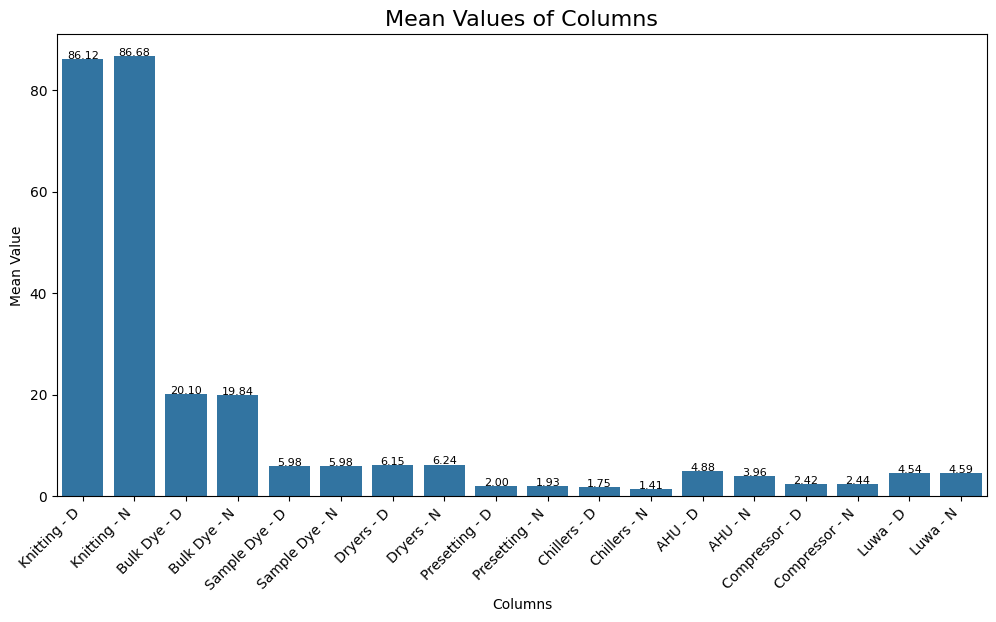

In [26]:
mean_values = data[columns].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=mean_values.index, y=mean_values.values)

# Add data labels
for i, value in enumerate(mean_values.values):
    plt.text(i, value + 0.05, f"{value:.2f}", ha='center', fontsize=8)  # Adjust offset and format as needed

# Add title and labels
plt.title("Mean Values of Columns", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Columns")
plt.ylabel("Mean Value")
plt.show()

### Feature and Target Selection

In [27]:
# Select features and target variable
features = data[['Knitting - D', 'Knitting - N', 'Bulk Dye - D', 'Bulk Dye - N', 
    'Sample Dye - D', 'Sample Dye - N', 'Dryers - D', 'Dryers - N', 
    'Presetting - D', 'Presetting - N', 'Chillers - D', 'Chillers - N', 
    'AHU - D', 'AHU - N', 'Compressor - D', 'Compressor - N', 'Luwa - D', 'Luwa - N']]
target = data['Total Water (Cu.m.)']

In [28]:
# Convert features and target to numeric to handle any remaining string issues
features = features.apply(pd.to_numeric)
target = pd.to_numeric(target)

### Train - Test Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Models

#### Gradient Boosting Regression

In [30]:
# Gradient Boosting Regression
gbr_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [31]:
gbr_cv_scores = cross_val_score(gbr_model, X_train, y_train, cv=5, scoring='r2')
print("Gradient Boosting Cross-validated R² scores:", gbr_cv_scores)
print("Gradient Boosting Mean Cross-validated R² score:", gbr_cv_scores.mean())

gbr_y_pred = gbr_model.predict(X_test)
print("Gradient Boosting MAE:", mean_absolute_error(y_test, gbr_y_pred))
print("Gradient Boosting RMSE:", math.sqrt(mean_squared_error(y_test, gbr_y_pred)))
print("Gradient Boosting R²:", r2_score(y_test, gbr_y_pred))

Gradient Boosting Cross-validated R² scores: [0.8297651  0.84080061 0.92007357 0.96307137 0.88641975]
Gradient Boosting Mean Cross-validated R² score: 0.8880260787424069
Gradient Boosting MAE: 68.8675581505941
Gradient Boosting RMSE: 94.2146128807575
Gradient Boosting R²: 0.941830237928057


#### Decision Tree Regression

In [32]:
# Decision Tree Regression
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, random_state=42)

In [33]:
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='r2')
print("Decision Tree Regression Cross-validated R² scores:", dt_cv_scores)
print("Decision Tree Regression Mean Cross-validated R² score:", dt_cv_scores.mean())

dt_y_pred = dt_model.predict(X_test)
print("Decision Tree Regression MAE:", mean_absolute_error(y_test, dt_y_pred))
print("Decision Tree Regression RMSE:", math.sqrt(mean_squared_error(y_test, dt_y_pred)))
print("Decision Tree Regression R²:", r2_score(y_test, dt_y_pred))

Decision Tree Regression Cross-validated R² scores: [0.82300147 0.76851658 0.82277135 0.91965618 0.83763175]
Decision Tree Regression Mean Cross-validated R² score: 0.8343154644736387
Decision Tree Regression MAE: 69.20472782329826
Decision Tree Regression RMSE: 102.23305912532255
Decision Tree Regression R²: 0.931507429681137


#### Random Forest Model Training with Hyperparameter Tuning

In [34]:
# Model selection and training
# Here we use a Random Forest Regressor as an example
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 66.41377207136757
Root Mean Squared Error (RMSE): 91.15068215112824


In [36]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Display the results
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score (similar to accuracy):", r2)

Mean Absolute Error (MAE): 66.41377207136757
Root Mean Squared Error (RMSE): 91.15068215112824
R² Score (similar to accuracy): 0.9455521672399377


#### Extra Trees Regression

In [37]:
# Extra Trees Regression
etr_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

# Fit the Extra Trees model

etr_model.fit(X_train, y_train)

ExtraTreesRegressor(random_state=42)

In [38]:
etr_cv_scores = cross_val_score(etr_model, X_train, y_train, cv=5, scoring='r2')
print("Extra Trees Regression Cross-validated R² scores:", etr_cv_scores)
print("Extra Trees Regression Mean Cross-validated R² score:", etr_cv_scores.mean())

etr_y_pred = etr_model.predict(X_test)
print("Extra Trees Regression MAE:", mean_absolute_error(y_test, etr_y_pred))
print("Extra Trees Regression RMSE:", math.sqrt(mean_squared_error(y_test, etr_y_pred)))
print("Extra Trees Regression R²:", r2_score(y_test, etr_y_pred))

Extra Trees Regression Cross-validated R² scores: [0.84207098 0.81372334 0.92371228 0.96145133 0.90951138]
Extra Trees Regression Mean Cross-validated R² score: 0.8900938617069791
Extra Trees Regression MAE: 62.38609684710565
Extra Trees Regression RMSE: 84.86362676186953
Extra Trees Regression R²: 0.952804137472838


#### Stacked Regression

In [39]:
# Ensemble model: Stacking with Extra Trees and Gradient Boosting
stacked_model = StackingRegressor(
    estimators=[
        ('et', etr_model),
        ('gb', gbr_model)
    ],
    final_estimator=Ridge(alpha=1.0)  # Ridge Regression as the meta-learner
)

stacked_model.fit(X_train, y_train)
stacked_y_pred = stacked_model.predict(X_test)
print("Stacked Model MAE:", mean_absolute_error(y_test, stacked_y_pred))
print("Stacked Model RMSE:", math.sqrt(mean_squared_error(y_test, stacked_y_pred)))
print("Stacked Model R²:", r2_score(y_test, stacked_y_pred))

Stacked Model MAE: 65.82455971478028
Stacked Model RMSE: 87.04149261087902
Stacked Model R²: 0.950350667842544


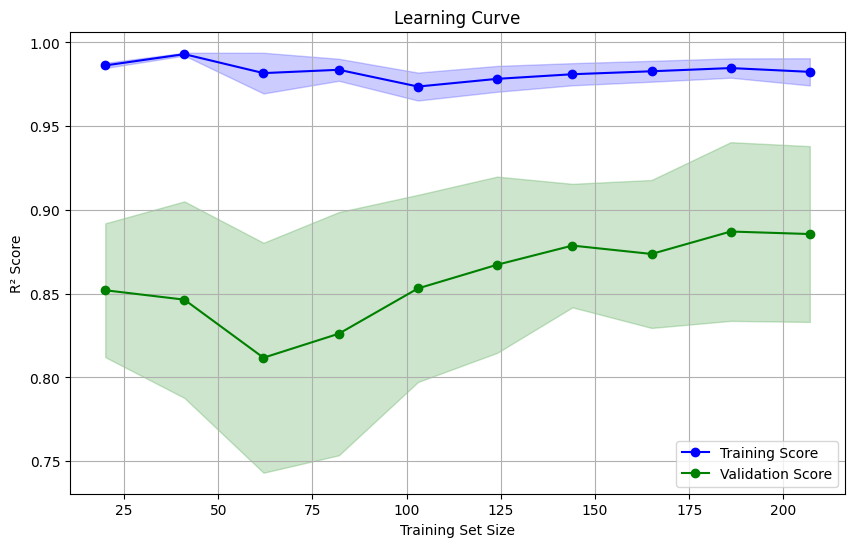

In [40]:
# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    estimator=stacked_model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='r2',  # R² score
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1,
    random_state=42
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue", marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.plot(train_sizes, val_mean, label="Validation Score", color="green", marker='o')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color="green")

# Plot settings
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.legend(loc="best")
plt.grid()
plt.show()

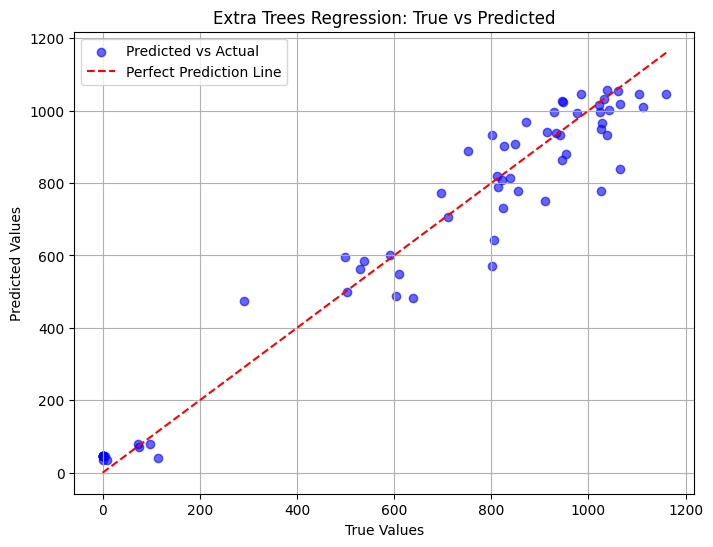

In [41]:
# Plot True vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, stacked_y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Extra Trees Regression: True vs Predicted')
plt.legend()
plt.grid()
plt.show()

Feature Importances (Averaged Across Base Models):
                Extra Trees  Gradient Boosting  Decision Tree  \
Bulk Dye - N       0.393627           0.808448       0.870259   
Bulk Dye - D       0.212363           0.065451       0.028809   
Luwa - D           0.078673           0.032261       0.017592   
Sample Dye - N     0.045365           0.028414       0.036444   
Luwa - N           0.085799           0.006468       0.012696   
Knitting - D       0.036640           0.010276       0.003791   
Dryers - N         0.033762           0.002264       0.005960   
Sample Dye - D     0.023603           0.009725       0.005314   
Knitting - N       0.012846           0.008606       0.016492   
Compressor - N     0.016188           0.006883       0.000000   
Dryers - D         0.015110           0.002889       0.001528   
Chillers - D       0.005665           0.006774       0.001115   
AHU - N            0.007507           0.003532       0.000000   
Presetting - N     0.010078           0

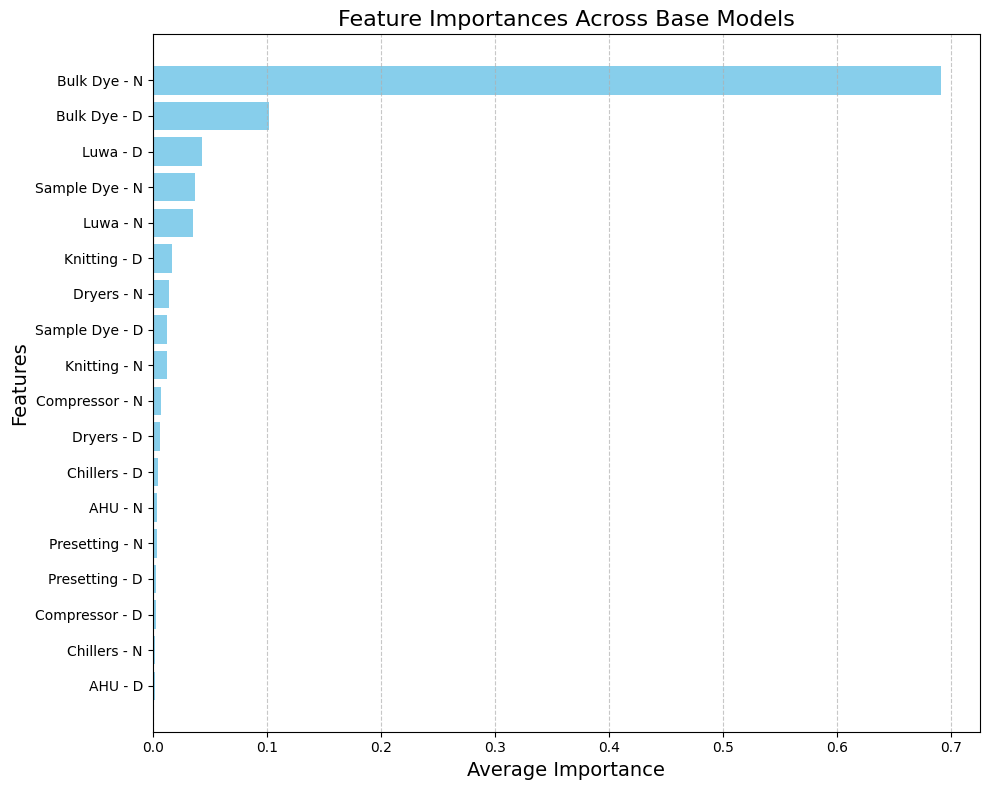

In [42]:
# Extract feature names
feature_names = X_train.columns

# Initialize a DataFrame to store feature importances
feature_importances = pd.DataFrame(index=feature_names)

# 1. Feature importance from Extra Trees
if hasattr(etr_model, 'feature_importances_'):
    feature_importances['Extra Trees'] = etr_model.feature_importances_
else:
    print("Extra Trees model does not provide feature importances.")

# 2. Feature importance from Gradient Boosting
if hasattr(gbr_model, 'feature_importances_'):
    feature_importances['Gradient Boosting'] = gbr_model.feature_importances_
else:
    print("Gradient Boosting model does not provide feature importances.")

# 3. Feature importance from Decision Tree
if hasattr(dt_model, 'feature_importances_'):
    feature_importances['Decision Tree'] = dt_model.feature_importances_
else:
    print("Decision Tree model does not provide feature importances.")

# Average the feature importances across all base models
feature_importances['Average Importance'] = feature_importances.mean(axis=1)

# Sort by average importance
feature_importances = feature_importances.sort_values(by='Average Importance', ascending=False)

# Display feature importances
print("Feature Importances (Averaged Across Base Models):")
print(feature_importances)

# 4. Coefficients from Ridge Regression (meta-learner)
if hasattr(stacked_model.final_estimator_, 'coef_'):
    ridge_coefs = stacked_model.final_estimator_.coef_
    print("\nMeta-Learner Ridge Regression Coefficients:")
    for i, coef in enumerate(ridge_coefs):
        print(f"Base Model {i+1} Coefficient: {coef:.4f}")
else:
    print("Meta-learner does not support coefficients.")

# Plot Inverse Histogram
plt.figure(figsize=(10, 8))
plt.barh(feature_importances.index, feature_importances['Average Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert the Y-axis to show the most important features at the top
plt.xlabel('Average Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importances Across Base Models', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Prediction Test

In [43]:
# Define new input data as a dictionary
# Replace these values with the new inputs you want to test

new_data = {
    'Knitting - D': [115], 
    'Knitting - N': [118], 
    'Bulk Dye - D': [26], 
    'Bulk Dye - N': [23], 
    'Sample Dye - D': [9], 
    'Sample Dye - N': [9], 
    'Dryers - D': [8], 
    'Dryers - N': [7], 
    'Presetting - D': [4], 
    'Presetting - N': [3], 
    'Chillers - D': [3], 
    'Chillers - N': [2], 
    'AHU - D': [5], 
    'AHU - N': [4], 
    'Compressor - D': [3], 
    'Compressor - N': [3], 
    'Luwa - D': [6], 
    'Luwa - N': [6]
}

# Convert the dictionary to a DataFrame
new_input = pd.DataFrame(new_data)

# Predict using the best model
predicted_consumption = stacked_model.predict(new_input)

# Display the predicted result
print("Predicted Water Consumption (Cu.m.) for new input:", predicted_consumption[0])

Predicted Water Consumption (Cu.m.) for new input: 804.8007269513685


In [44]:
with open('./water_pkl.sav', 'wb') as file:
    pickle.dump(stacked_model, file)